In [1]:
import numpy as np
from astropy.table import Table, join, MaskedColumn, vstack
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
from astropy.time import Time
import pandas as pd
import re
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
from math import e
from math import pi
from astropy.table import Column
from math import sqrt
import numpy as np
import emcee
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import math
import corner
from numpy import exp
from scipy import integrate
from scipy.integrate import quad
import pdb
import powerlaw
import random

(array([1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186,
       1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197,
       1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208,
       1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218]),)
776
5


/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


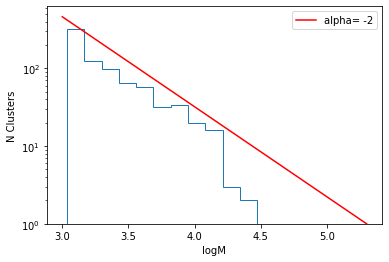

In [2]:
#Trying to generate randomn samples that follows a power law distribution with an upper mass truncation

theoretical_distribution = powerlaw.Power_Law(xmin=1086, xmax=8500, parameters = [2], discrete=True)
simulated_data=theoretical_distribution.generate_random(1230)
fake_M_l=[]
for i in range(len(simulated_data)):
    fake_M_l.append(simulated_data[i])

A3_fml=[]
for i in range(len(fake_M_l)):
    if fake_M_l[i] >=1086 and fake_M_l[i] < 10**5.1:
        A3_fml.append(fake_M_l[i])
        
A3_fml.sort()

fake_M=np.array(A3_fml)
fake_M

print(np.where(fake_M>22387))

random_ints = np.array(random.sample(range(1150, 1220), 50))
random_ints2 = np.array(random.sample(range(300, 1210), 415))
new_fake_M=np.delete(fake_M, [random_ints])
new_fake_M2=np.delete(new_fake_M, [random_ints2])

log_FMl=[]
for i in range(len(new_fake_M2)):
    log_FMl.append(np.log10(new_fake_M2[i]))
    
log_FM= np.array(log_FMl)
log_FM
print(len(log_FM))

count_above_thresh=[]
    
for i in range(len(log_FM)):
    if log_FM[i] > 4.35:
        count_above_thresh.append(i)
        
print(len(count_above_thresh))


x=[3,5.3]
y=[461,1]
plt.hist(log_FM, histtype='step', bins=15)
plt.plot(x,y, c='r', label='alpha= -2')
#plt.xlim(2.99,5)
plt.yscale('log')
plt.ylim(1)
plt.xlabel('logM')
plt.ylabel('N Clusters')
plt.legend()

In [ ]:
#While I am using Fake Data, I will not be using Tau as it will change the answer
#Thus I will be setting M_Lim= 1000

AP_data_table: ['APID', 'RegID', 'logAge-Best', 'logAge-P16', 'logAge-P84', 'logMass-Best', 'logMass-P16', 'logMass-P84']


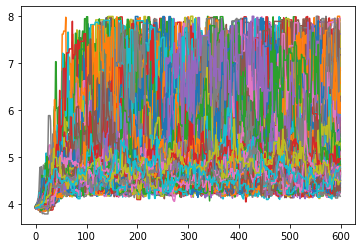

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


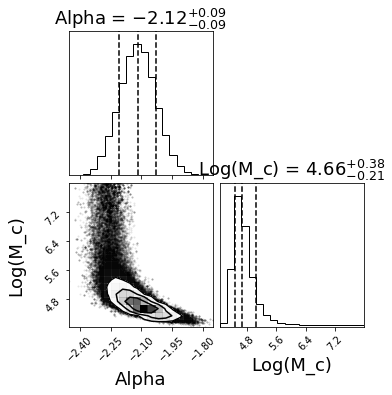

In [3]:
AP_data_table=Table.read("APData_csv.csv")
print("AP_data_table:", AP_data_table.colnames)

M=np.array(AP_data_table['logMass-Best'])
Tau= np.array(AP_data_table['logAge-Best'])
a_lim=5.0

def M_lim(Tau):
    for age in Tau:
        if 7.0 < age < 8.0 :
            return 740
        if 8.0 < age < np.log10(300000000) : 
            return 1080

def lnZ(theta, M):
    alpha, M_c = theta
    lin_M_c= 10**M_c
    def f(M):
        return (M**alpha)*exp(-M/lin_M_c)
    ans, err = quad(f, 1000, np.inf)
    return np.log(ans)

def lnlike(theta, M):
    alpha, M_c = theta
    lin_M= 10**M
    lin_M_c= 10**M_c
    return (np.sum(-lin_M/lin_M_c + alpha*np.log(lin_M) - lnZ(theta, lin_M)))

def lnprior(theta):
    alpha, M_c = theta
    if -3 <= alpha <= -1 and 3 <= M_c <= 8:
        return 0.0
    return -np.inf

def lnprob(theta, M):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, M)

starting_point=np.array([-1.99, 3.93])

ndim, nwalkers = 2, 500
nsteps= 600
burnin=100
pos = starting_point + 1e-2*np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=([log_FM]))
sampler.run_mcmc(pos, nsteps)

#plot chain
plt.plot(np.transpose(sampler.chain[:,:,1]))
plt.show()
sampler.get_chain(thin=5)
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["Alpha", "Log(M_c)"], label_kwargs={"fontsize": 18},
                                     quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})

fig.show()

In [ ]:
#show true vaules in corner plot

In [21]:
def error_calc():
    """"Creating Fake data set"""
    
    theoretical_distribution = powerlaw.Power_Law(xmin=1086, xmax=8500, parameters = [2], discrete=True)
    simulated_data=theoretical_distribution.generate_random(1230)
    fake_M_l=[]
    for i in range(len(simulated_data)):
        fake_M_l.append(simulated_data[i])

    A3_fml=[]
    for i in range(len(fake_M_l)):
        if fake_M_l[i] >=1086 and fake_M_l[i] < 10**5.1:
            A3_fml.append(fake_M_l[i])
        
    A3_fml.sort()

    fake_M=np.array(A3_fml)
    fake_M

    random_ints = np.array(random.sample(range(1150, 1220), 50))
    random_ints2 = np.array(random.sample(range(300, 1210), 415))
    new_fake_M=np.delete(fake_M, [random_ints])
    new_fake_M2=np.delete(new_fake_M, [random_ints2])

    log_FMl=[]
    for i in range(len(new_fake_M2)):
        log_FMl.append(np.log10(new_fake_M2[i]))
    
    log_FM= np.array(log_FMl)
    log_FM

    """"Defining Functions to run for MCMC"""
    
    def lnZ(theta, M):
        alpha, M_c = theta
        lin_M_c= 10**M_c
        def f(M):
            return (M**alpha)*exp(-M/lin_M_c)
        ans, err = quad(f, 1000, np.inf)
        return np.log(ans)

    def lnlike(theta, M):
        alpha, M_c = theta
        lin_M= 10**M
        lin_M_c= 10**M_c
        return (np.sum(-lin_M/lin_M_c + alpha*np.log(lin_M) - lnZ(theta, lin_M)))

    def lnprior(theta):
        alpha, M_c = theta
        if -3 <= alpha <= -1 and 3 <= M_c <= 8:
            return 0.0
        return -np.inf

    def lnprob(theta, M):
        lp = lnprior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp + lnlike(theta, M)

    """"Running MCMC"""
    starting_point=np.array([-2.00, 4.00])

    ndim, nwalkers = 2, 500
    nsteps= 600
    burnin=100
    pos = starting_point + 1e-2*np.random.randn(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=([log_FM]))
    sampler.run_mcmc(pos, nsteps)

    sampler.get_chain(thin=5)
    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    
    true_alpha=[i[0] for i in samples]
    true_Mc= [i[1] for i in samples]
    med_ta=np.median(true_alpha)
    med_tMc= np.median(true_Mc)
    lower_sigma_ta= np.percentile(true_alpha, 16)
    upper_sigma_ta= np.percentile(true_alpha, 84)
    lower_sigma_tMc= np.percentile(true_Mc, 16)
    upper_sigma_tMc= np.percentile(true_Mc, 84)
    
    distribution=np.array((med_ta, lower_sigma_ta, upper_sigma_ta, med_tMc, lower_sigma_tMc, upper_sigma_tMc))
    
    
    """"Generating Scatter in the data"""
    def err_MCMC(scatter, log_FM):
        spread_FM = []
        rand_spread= [np.random.normal(0, scatter) for i in range(len(log_FM))]
        spread_FM.append(log_FM + rand_spread)
        spread_FM=np.array(spread_FM)
        spread_FM
        """"Running MCMC on new distribution"""
        starting_point=np.array([-2.00, 4.00])
        ndim, nwalkers = 2, 500
        nsteps= 600
        burnin=100
        pos = starting_point + 1e-2*np.random.randn(nwalkers, ndim)
        
        e_sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=([spread_FM]))
        e_sampler.run_mcmc(pos, nsteps)

        e_sampler.get_chain(thin=5)
        e_samples = e_sampler.chain[:, burnin:, :].reshape((-1, ndim))
    
        alpha=[i[0] for i in e_samples]
        Mc= [i[1] for i in e_samples]
        
        med_a=np.median(alpha)
        upper_sig_a= np.percentile(alpha, 84)  
        lower_sig_a= np.percentile(alpha, 16)
        med_Mc=np.median(Mc)
        upper_sig_Mc= np.percentile(Mc, 84)
        lower_sig_Mc= np.percentile(Mc, 16)
        
        return np.array((med_a, lower_sig_a, upper_sig_a, med_Mc, lower_sig_Mc, upper_sig_Mc))
    
    scatter=[.05, .1, .15, .2, .25, .3, .35, .4]
        
    results=np.zeros((len(scatter)+1, 6))    
    
    results[0]= distribution
    
    for i in range(1,len(scatter)+1):
        for k in range(len(scatter)):
            results[i]=err_MCMC(scatter[(i-1)], log_FM)
        
    return results

first_round=error_calc()

first_round

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


array([[-2.14382555, -2.2208982 , -2.06401154,  4.93999095,  4.65828515,
         5.63230892],
       [-2.13690795, -2.21163075, -2.05863598,  4.96825549,  4.6824105 ,
         5.65428641],
       [-2.16522293, -2.24047821, -2.08432899,  4.98448095,  4.67764115,
         5.83230195],
       [-2.1810439 , -2.23744654, -2.11522432,  5.47442074,  4.96935105,
         6.8773032 ],
       [-2.18530645, -2.23674406, -2.1276298 ,  5.81093236,  5.16466117,
         7.12350024],
       [-2.19094192, -2.23576734, -2.14655349,  6.70125131,  5.87527397,
         7.57404188],
       [-2.32809273, -2.37701151, -2.28024718,  6.8525571 ,  6.03550809,
         7.63336717],
       [-2.26396106, -2.30949567, -2.21921558,  7.02212336,  6.28576441,
         7.69126165],
       [-2.27347853, -2.32003176, -2.22764299,  7.04421394,  6.3166737 ,
         7.69619157]])

In [40]:
def plot(first_round):
    a0=[i[0] for i in first_round]
    a1=[i[1] for i in first_round]
    a2=[i[2] for i in first_round]
    M0=[i[3] for i in first_round]
    M1=[i[4] for i in first_round]
    M2=[i[5] for i in first_round]

    a_dist_from_true=[]
    for i in range(1,len(a0)):
        a_dist_from_true.append(a0[i]- a0[0])
    
    a_dist_from_true

    Mc_dist_from_true=[]
    for i in range(1,len(a0)):
        Mc_dist_from_true.append(M0[i]- M0[0])
    
    Mc_dist_from_true
    scatter=[.05, .1, .15, .2, .25, .3, .35, .4]
    plt.scatter(scatter, a_dist_from_true, color='b', marker='o', label='Alpha')
    plt.scatter(scatter, Mc_dist_from_true, color='r', marker='o', label='Mc')
    plt.xlabel('Implemented Scatter')
    plt.ylabel('Distance from True Value')
    plt.legend()
    plt.show()
    
    return a_dist_from_true, Mc_dist_from_true

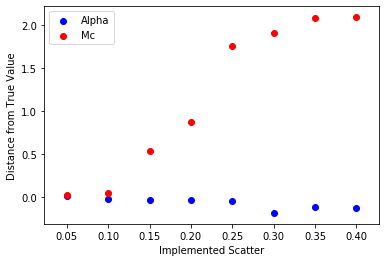

In [39]:
afr, mfr = plot(first_round)

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


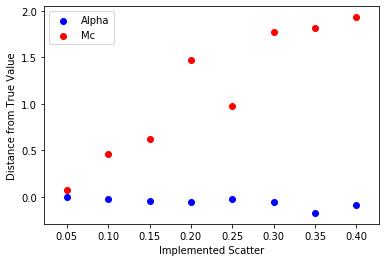

In [42]:
second_round=error_calc()

asr, msr = plot(second_round)

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


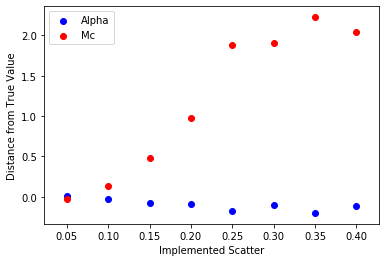

In [43]:
third_round=error_calc()

atr, mtr = plot(third_round)

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


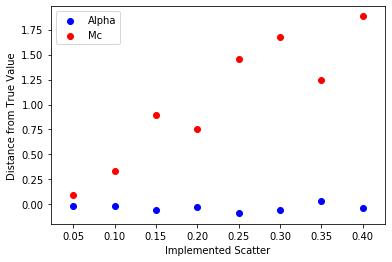

In [44]:
fourth_round=error_calc()

arr, mrr = plot(fourth_round)

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


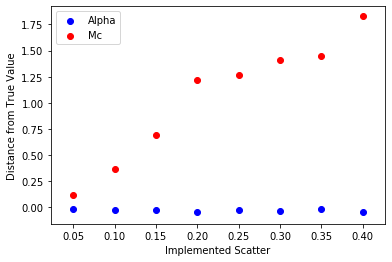

In [45]:
fith_round=error_calc()

ahr, mhr = plot(fith_round)

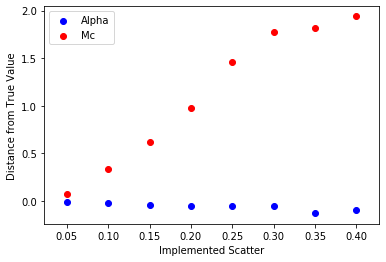

In [53]:
as05=[]
as10=[]
as15=[]
as20=[]
as25=[]
as30=[]
as35=[]
as40=[]

ms05=[]
ms10=[]
ms15=[]
ms20=[]
ms25=[]
ms30=[]
ms35=[]
ms40=[]
        
as05.append([afr[0], asr[0], atr[0], arr[0], ahr[0]])
as10.append([afr[1], asr[1], atr[1], arr[1], ahr[1]])
as15.append([afr[2], asr[2], atr[2], arr[2], ahr[2]])
as20.append([afr[3], asr[3], atr[3], arr[3], ahr[3]])
as25.append([afr[4], asr[4], atr[4], arr[4], ahr[4]])
as30.append([afr[5], asr[5], atr[5], arr[5], ahr[5]])
as35.append([afr[6], asr[6], atr[6], arr[6], ahr[6]])
as40.append([afr[7], asr[7], atr[7], arr[7], ahr[7]])

ms05.append([mfr[0], msr[0], mtr[0], mrr[0], mhr[0]])
ms10.append([mfr[1], msr[1], mtr[1], mrr[1], mhr[1]])
ms15.append([mfr[2], msr[2], mtr[2], mrr[2], mhr[2]])
ms20.append([mfr[3], msr[3], mtr[3], mrr[3], mhr[3]])
ms25.append([mfr[4], msr[4], mtr[4], mrr[4], mhr[4]])
ms30.append([mfr[5], msr[5], mtr[5], mrr[5], mhr[5]])
ms35.append([mfr[6], msr[6], mtr[6], mrr[6], mhr[6]])
ms40.append([mfr[7], msr[7], mtr[7], mrr[7], mhr[7]])

med_as=[np.median(as05), np.median(as10), np.median(as15), np.median(as20), np.median(as25), np.median(as30),
        np.median(as35), np.median(as40)]

med_ms=[np.median(ms05), np.median(ms10), np.median(ms15), np.median(ms20), np.median(ms25), np.median(ms30),
        np.median(ms35), np.median(ms40)]

scatter=[.05, .1, .15, .2, .25, .3, .35, .4]
plt.scatter(scatter, med_as, color='b', marker='o', label='Alpha')
plt.scatter(scatter, med_ms, color='r', marker='o', label='Mc')
plt.xlabel('Implemented Scatter')
plt.ylabel('Median Distance from True Value')
plt.legend()
plt.show()

(3, 4.6)

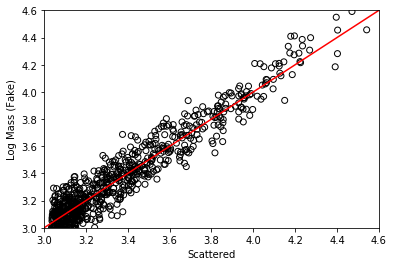

In [161]:
spread_FM2 = []
width=.1
rand_spread= [np.random.normal(0, width) for i in range(len(log_FM))]

spread_FM2.append(log_FM + rand_spread)
    
spread_FM2=np.array(spread_FM2)
spread_FM2

plt.scatter(log_FM, spread_FM2, marker='o', facecolor='None', color='k')
plt.plot([2, 4.6], [2,4.6], color='r')
plt.xlabel('Scattered')
plt.ylabel('Log Mass (Fake)')
plt.xlim(3,4.6)
plt.ylim(3,4.6)

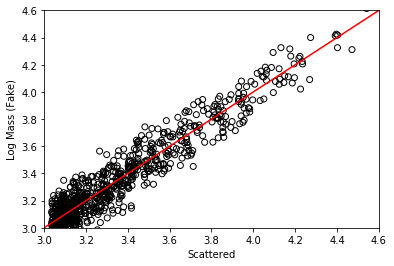

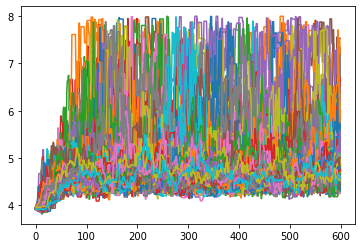

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


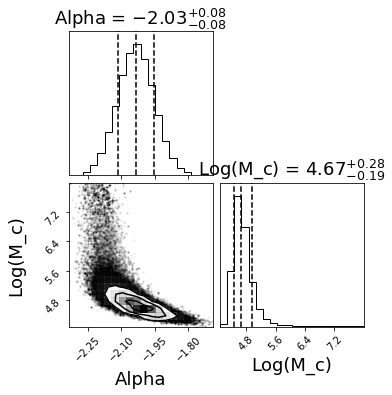

In [177]:
spread_FM2 = []
width=.1
rand_spread= [np.random.normal(0, width) for i in range(len(log_FM))]

spread_FM2.append(log_FM + rand_spread)
    
spread_FM2=np.array(spread_FM2)
spread_FM2

plt.scatter(log_FM, spread_FM2, marker='o', facecolor='None', color='k')
plt.plot([2, 4.6], [2,4.6], color='r')
plt.xlabel('Scattered')
plt.ylabel('Log Mass (Fake)')
plt.xlim(3,4.6)
plt.ylim(3,4.6)
plt.show()

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=([spread_FM2]))
sampler.run_mcmc(pos, nsteps)

#plot chain
plt.plot(np.transpose(sampler.chain[:,:,1]))
plt.show()
sampler.get_chain()
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["Alpha", "Log(M_c)"], label_kwargs={"fontsize": 18},
                                     quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})

fig.show()

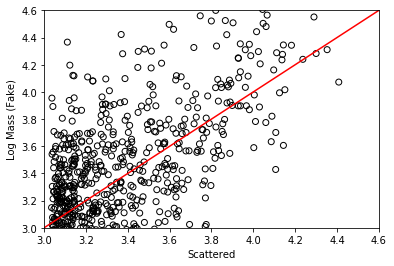

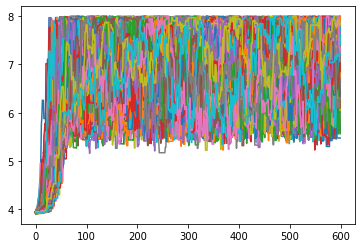

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


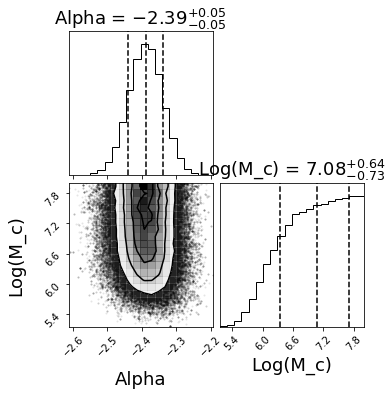

In [41]:
spread_FM2 = []
width=.4
rand_spread= [np.random.normal(0, width) for i in range(len(log_FM))]

spread_FM2.append(log_FM + rand_spread)
    
spread_FM2=np.array(spread_FM2)
spread_FM2

plt.scatter(log_FM, spread_FM2, marker='o', facecolor='None', color='k')
plt.plot([2, 4.6], [2,4.6], color='r')
plt.xlabel('Scattered')
plt.ylabel('Log Mass (Fake)')
plt.xlim(3,4.6)
plt.ylim(3,4.6)
plt.show()

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=([spread_FM2]))
sampler.run_mcmc(pos, nsteps)

#plot chain
plt.plot(np.transpose(sampler.chain[:,:,1]))
plt.show()
sampler.get_chain(thin=5)
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["Alpha", "Log(M_c)"], label_kwargs={"fontsize": 18},
                                     quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})

fig.show()